In [41]:
# To restart the kernel and clear all variables, run this magic command:
%reset -f

In [42]:
from matplotlib.ticker import MultipleLocator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm
import numpy as np
from importlib import reload
from IPython.display import clear_output
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import os

import decid_package.my_functions as decid
import decid_package.my_plotfunctions as plotf


sns.set_style("white")  # or "white", etc.

from matplotlib import rcParams

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})



# IMPORT DATA

In [43]:
df_tomst = pd.read_csv("../outputs/df_tomst_20.csv")
df_tomst['DateTime'] = pd.to_datetime(df_tomst['DateTime'])

df_natkon = pd.read_csv("../outputs/df_natkon_20.csv")
df_natkon['DateTime'] = pd.to_datetime(df_natkon['DateTime'])

df_sap_flow = pd.read_csv("../outputs/df_sap_flow_20.csv")
df_sap_flow['DateTime'] = pd.to_datetime(df_sap_flow['DateTime'])

df_phenocam = pd.read_csv("../outputs/df_phenocam_period.csv")
df_phenocam['DateTime'] = pd.to_datetime(df_phenocam['DateTime'])

df_all = pd.read_csv('../outputs/df_all.csv')
df_all['DateTime'] = pd.to_datetime(df_all['DateTime'])

In [89]:
# df_natkon.head()

# COLOR setup

In [45]:
reload(plotf)

<module 'decid_package.my_plotfunctions' from 'c:\\Users\\decle\\OneDrive - UGent\\_Vakantiejob_Rune_Declercq\\scripts\\decid_package\\my_plotfunctions.py'>

In [46]:
colors = plotf.get_color_maps()
sensor_colors = colors['sensor']
phen_colors = colors['phenology']
bloom_colors = colors['bloom']
season_colors = colors['season']


# Get diurnal features

In [47]:
reload(decid)
reload(plotf)

<module 'decid_package.my_plotfunctions' from 'c:\\Users\\decle\\OneDrive - UGent\\_Vakantiejob_Rune_Declercq\\scripts\\decid_package\\my_plotfunctions.py'>

In [48]:
diurnal_dfs = {'natkon':df_natkon,
               'tomst':df_tomst,  
               'sapflow':df_sap_flow}

diurnal_cols = {'natkon':'detrended_daily_mean',
               'tomst':'detrended_daily_mean',
                'sapflow':'detrended_daily_mean'}
ax_titles = {
    'Natkon': r'$\Delta$ diameter (cm)',
    'Tomst': r'$\Delta$ diameter (cm)',
    'Sapflow': r'$\Delta$ sap flow (l.h$^{-1}$)'
}

waveform_dict = {}

for key in diurnal_dfs:
    diurnal_dfs[key].set_index('DateTime', inplace=True)
    waveform_metrics = decid.extract_waveform_metrics(diurnal_dfs[key])
    diurnal_dfs[key].reset_index(inplace=True)
    waveform_dict[key] = waveform_metrics


In [49]:
reload(plotf)

<module 'decid_package.my_plotfunctions' from 'c:\\Users\\decle\\OneDrive - UGent\\_Vakantiejob_Rune_Declercq\\scripts\\decid_package\\my_plotfunctions.py'>

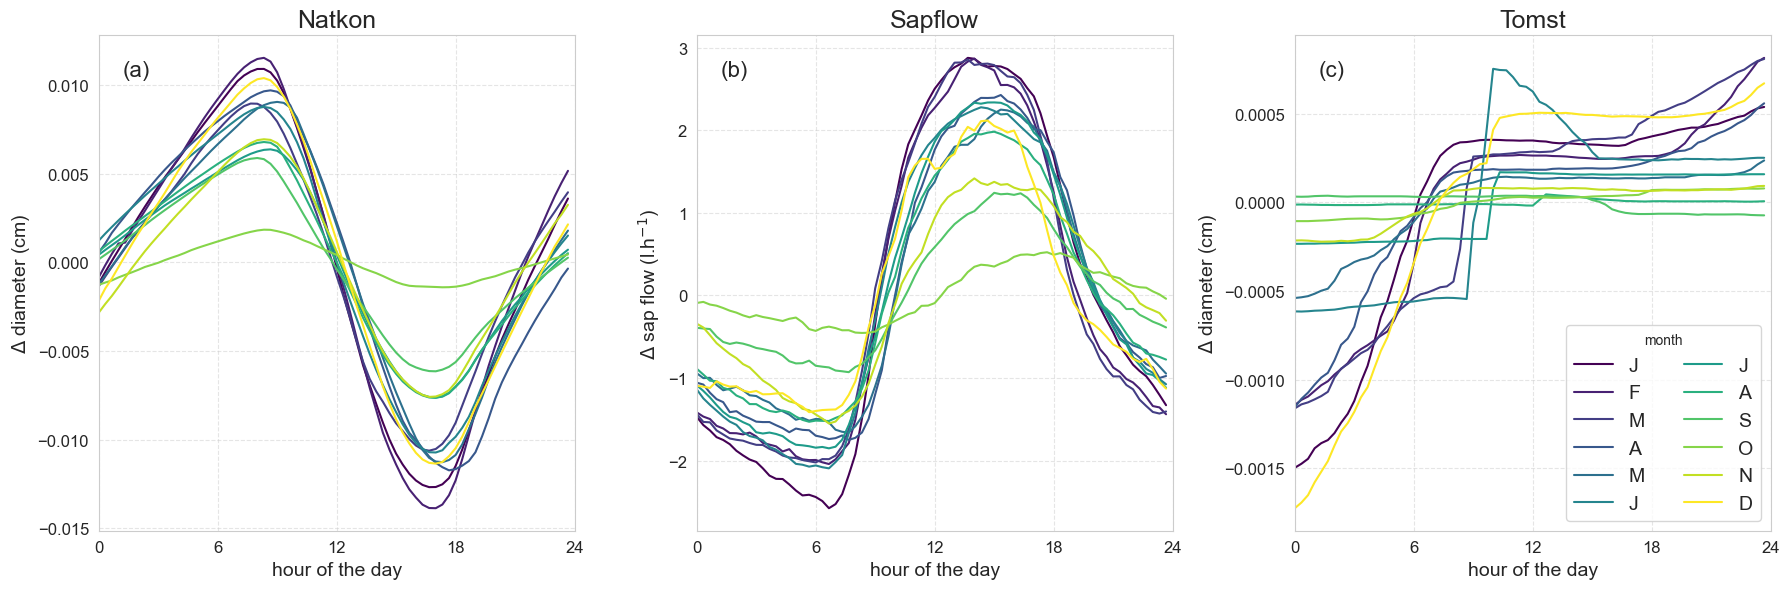

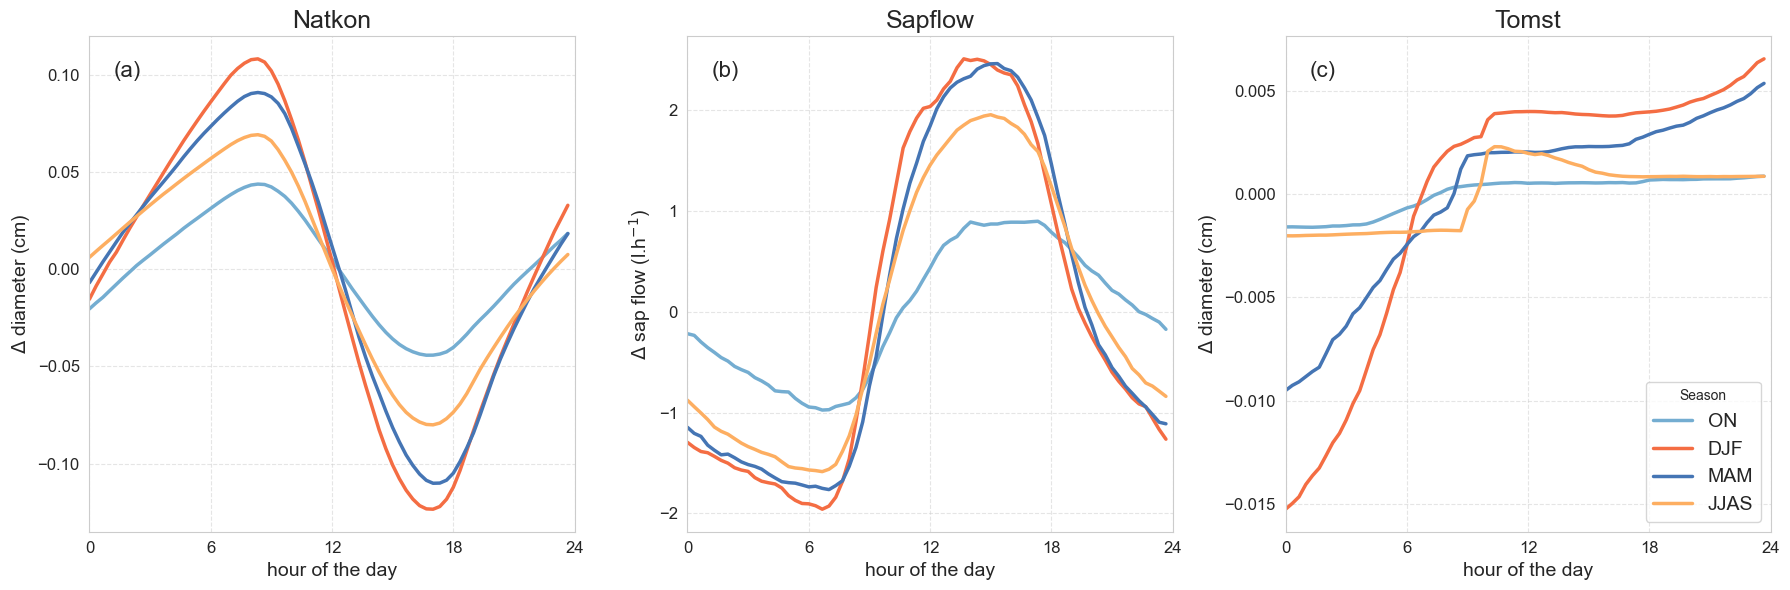

In [50]:
plotf.plot_diurnal_profiles(diurnal_dfs, diurnal_cols, ax_titles, save = False, filename = "diurnal_profiles_3_sensors.png")
plotf.plot_diurnal_by_season(diurnal_dfs, diurnal_cols, ax_titles, save = False, filename="diurnal_seasons_3_sensors_hor.png")

### periods definition

In [51]:
periods = {
    'dormant_1': ('2023-07-01', '2023-09-30'),
    'rainy_transition_1': ('2023-10-01', '2023-12-15'),
    'steady_growth_1': ('2023-12-16', '2024-04-09'),
    'drought_dip_1': ('2024-04-10', '2024-05-15'),
    'recovery_1': ('2024-05-16', '2024-06-30'),
    'dormant_2': ('2024-07-01', '2024-10-15'),
    'rainy_transition_2': ('2024-10-01', '2024-12-15') 
}

periods_phenology = {
    'steady': ('2024-07-15', '2024-09-20'),
    'pre-flush': ('2024-09-21', '2024-10-20'),
    'flush': ('2024-10-21', '2024-11-16'),
    'post-flush': ('2024-11-17', '2025-01-15')
}


for df in diurnal_dfs.values():
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['period'] = 'unknown'
    df['phenology'] = 'unknown'
    df['season'] = df['DateTime'].map(decid.get_equatorial_season)

    for label, (start, end) in periods.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'period'] = label

    for label, (start, end) in periods_phenology.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'phenology'] = label

In [52]:
start = 0
end = 237
period = 2

In [53]:

# Get start date of this period
start_date_phen = df_phenocam.loc[
    (df_phenocam['Period'] == (period - 1)) & 
    (df_phenocam['Day_of_Period'] == start),
    'DateTime'
].iloc[0]
end_date_phen = df_phenocam.loc[
    (df_phenocam['Period'] == (period - 1)) & 
    (df_phenocam['Day_of_Period'] == end),
    'DateTime'
].iloc[0]

print(start_date_phen)
print(end_date_phen)

2024-06-07 10:00:00
2025-01-30 10:00:00


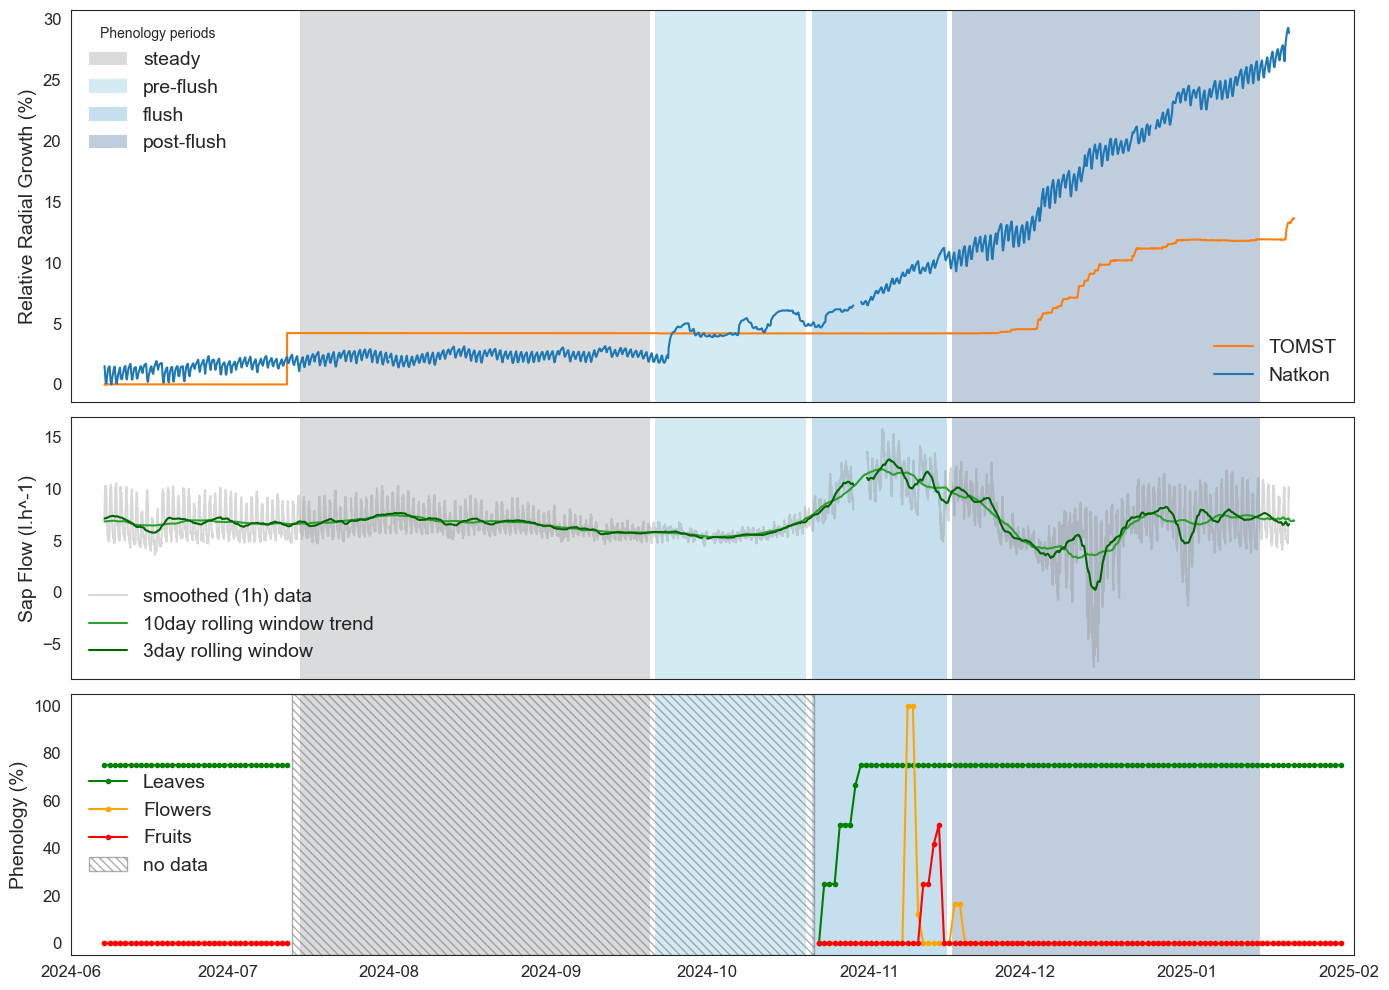

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

sns.set_style("white")   # or "ticks", but pick one



# --- Filter zoomed data ---
df_zoom_phen = df_all[(df_all['DateTime'] >= start_date_phen) & 
                      (df_all['DateTime'] <= end_date_phen)]

df_phen_zoom = df_phenocam[(df_phenocam['DateTime'] >= start_date_phen) & 
                                  (df_phenocam['DateTime'] <= end_date_phen)]

# --- Create subplots ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True, 
                                     gridspec_kw={'height_ratios': [3, 2, 2]})

# --- Top: dendrometer sensors ---
for sensor in ['TOMST', 'Natkon']:
    df_s = df_zoom_phen[df_zoom_phen['Sensor'] == sensor]
    ycol = 'smoothed_signal_pct_period'
    ax1.plot(df_s['DateTime'], df_s[ycol]*100, label=sensor, color = sensor_colors[sensor])
ax1.set_ylabel('Relative Radial Growth (%)')
# ax1.legend(frameon = False)
# ax1.set_title('Event 1: Zoomed Sensor and Phenology Data')

handles_lines, labels_lines = ax1.get_legend_handles_labels()
line_legend = ax1.legend(handles_lines, labels_lines, frameon=False, loc='lower right')



# --- Middle: Sap Flow ---
df_sap = df_zoom_phen[df_zoom_phen['Sensor'] == 'Sap Flow'].dropna(axis=1, how='all')

ax2.plot(df_sap['DateTime'], df_sap['smoothed_signal'], color = 'gray', alpha = 0.3, label='smoothed (1h) data')
ax2.plot(df_sap['DateTime'], df_sap['smoothed_signal_roll10d'], color = sensor_colors['Sap Flow'], label='10day rolling window trend')
ax2.plot(df_sap["DateTime"], df_sap["short_trend"], color='darkgreen', label='3day rolling window')
ax2.set_ylabel('Sap Flow (l.h^-1)')
ax2.legend(frameon = False)

# --- Bottom: Phenology ---
ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%leafs'], color='green', label='Leaves', marker = 'o', markersize = 3)
ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%flowers'], color='orange', label='Flowers',  marker = 'o', markersize = 3)
ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%fruits'], color='red', label='Fruits',  marker = 'o', markersize = 3)

# # Plot NaNs as grey markers
# na_mask = df_phen_zoom['%leafs'].isna()
# ax3.plot(df_phen_zoom['DateTime'][na_mask], 
#             np.zeros_like(df_phen_zoom['%leafs'][na_mask]),  # or use np.nan to just mark points
#             'o', color='grey', markersize=4, label = 'NA')

na_mask = df_phen_zoom['%leafs'].isna()
missing_dates = df_phen_zoom['DateTime'][na_mask].dropna().sort_values()

if not missing_dates.empty:
    gaps = np.split(missing_dates.to_numpy(), np.where(np.diff(missing_dates.to_numpy()) != np.timedelta64(1, 'D'))[0]+1)
    for i, gap in enumerate(gaps):
        ax3.axvspan(
            gap[0], gap[-1],
            facecolor="none",
            hatch='\\\\\\\\',
            edgecolor="#777777",
            alpha=0.6,
            label='no data' if i == 0 else None
        )

ax3.set_ylabel('Phenology (%)')
# ax3.set_xlabel('DateTime')
ax3.legend(frameon = False, loc = 'center left')

ax3.set_xlim(pd.Timestamp('2024-06-01'), pd.Timestamp('2025-02-02'))

# --- Add shading for phenology periods ---
for label, (start, end) in periods_phenology.items():
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    
    # Only shade if the period overlaps with the zoomed range
    if end_dt >= start_date_phen and start_dt <= end_date_phen:
        shade_color = phen_colors.get(label, 'lightgrey')
        for ax in [ax1, ax2, ax3]:
            ax.axvspan(start_dt, end_dt, facecolor=shade_color, alpha=0.25, label=f'{label} period', zorder = 0, edgecolor = 'none')
        # print(f"Shading {label} from {start_dt} to {end_dt}")

shading_handles = []
shading_labels = []
for label, color in phen_colors.items():
    patch = Patch(facecolor=color, alpha=0.25, edgecolor='none')
    shading_handles.append(patch)
    shading_labels.append(label)

shade_legend = ax1.legend(shading_handles, shading_labels, frameon=False, loc='upper left', title='Phenology periods')
ax1.add_artist(line_legend)


import string
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.grid(False)
    # ax.text(0.01, 0.95, f'({string.ascii_lowercase[i]})',
    #             transform=ax.transAxes,
    #             fontsize=13, va='top', ha='left')


# # Optional: avoid duplicate legend entries
# handles, labels = ax1.get_legend_handles_labels()
# unique = dict(zip(labels, handles))
# ax1.legend(unique.values(), unique.keys(), frameon = False)

plt.tight_layout()
plt.savefig('../outputs/figures/leaf_flush_zoom.png', dpi=300)
plt.show()


## season plots

In [55]:
diurnal_dfs = {'natkon':df_natkon,
               'tomst':df_tomst,  
               'sapflow':df_sap_flow}

diurnal_cols = {'natkon':'detrended_daily_mean',
               'tomst':'detrended_daily_mean',
                'sapflow':'detrended_daily_mean'}

ax_titles = {
    'Natkon': r'$\Delta$ diameter (cm)',
    'Tomst': r'$\Delta$ diameter (cm)',
    'Sapflow': r'$\Delta$ sap flow (l.h$^{-1}$)'
}

In [56]:
plotf.plot_diurnal_profiles(
    diurnal_dfs,
    value_cols=diurnal_cols,
    ax_titles = ax_titles, 
    save = True, 
    filename = 'all_sensors_diurnal.png'
)

clear_output()

#### take out rain days

In [57]:
rain_ids_period2 = {'1': pd.Timestamp('2024-09-23 11:20:00'),
                    '2': pd.Timestamp('2024-10-06 21:00:00'),
                    '3': pd.Timestamp('2024-10-13 02:40:00'),
                    '4': pd.Timestamp('2024-10-23 14:00:00')}


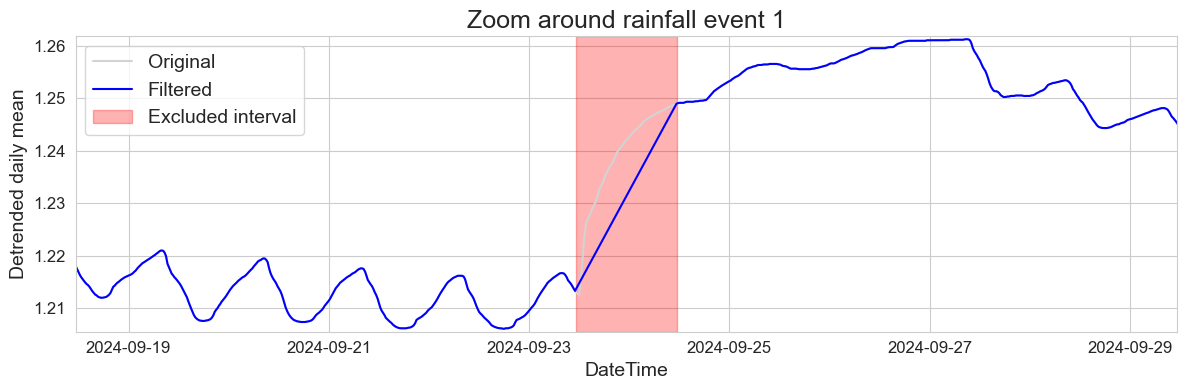

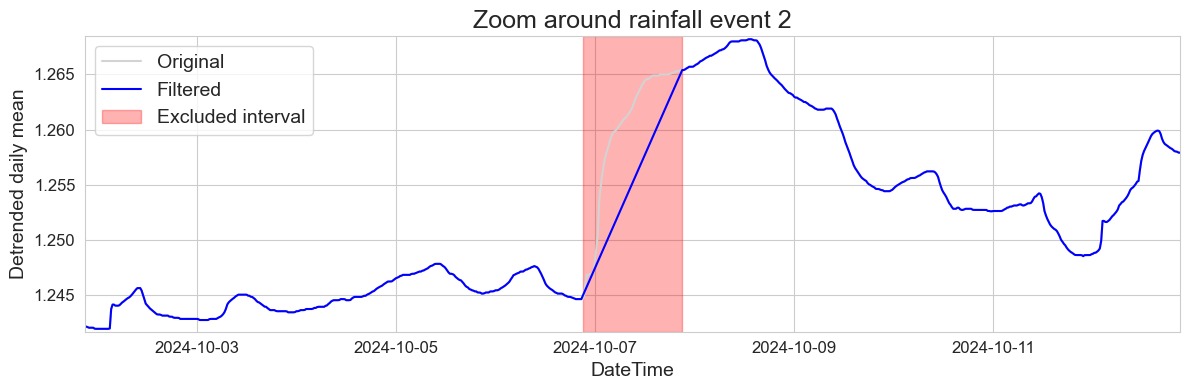

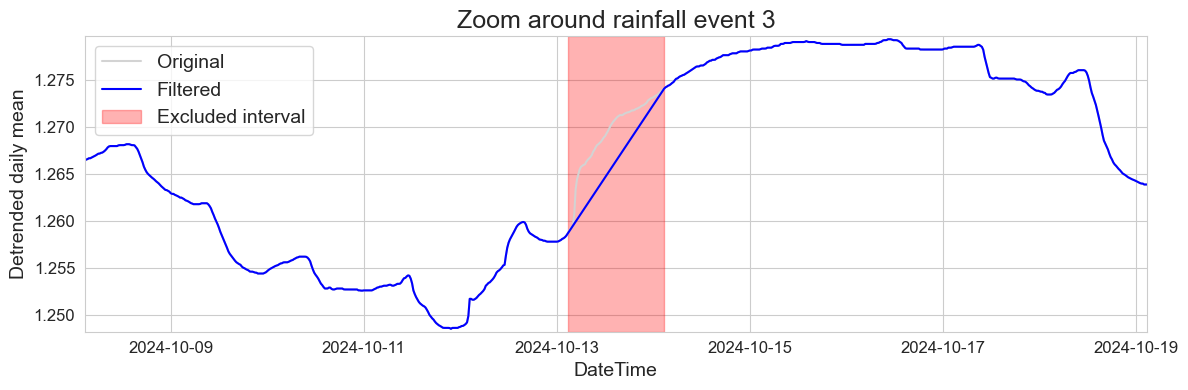

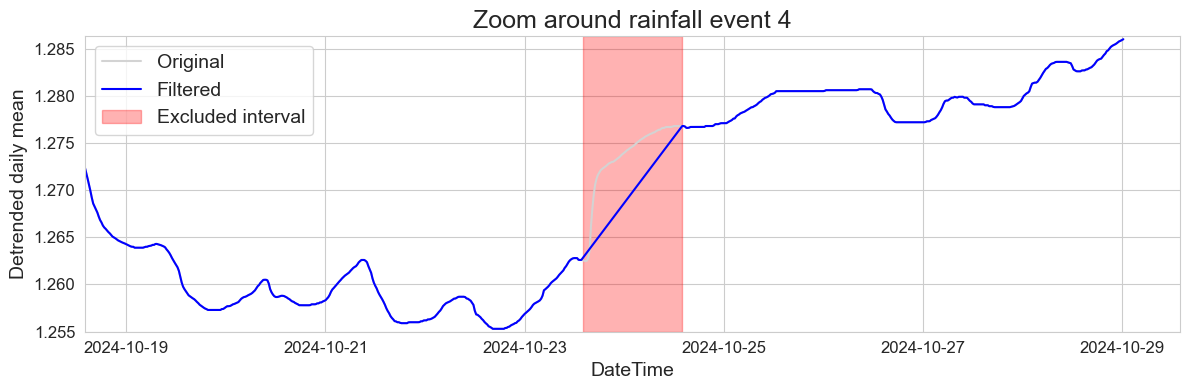

In [58]:
import matplotlib.pyplot as plt

# Build exclusion intervals
rain_intervals = [(ts, ts + pd.Timedelta(days=1)) for ts in rain_ids_period2.values()]

key = 'natkon'
df = diurnal_dfs[key].copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Apply filter
mask = pd.Series(False, index=df.index)
for start, end in rain_intervals:
    mask |= (df['DateTime'] >= start) & (df['DateTime'] < end)
df_clean = df[~mask]

# Loop through rainfall intervals and plot zoomed views
for i, (start, end) in enumerate(rain_intervals, 1):
    fig, ax = plt.subplots(figsize=(12, 4))

    # Original
    ax.plot(df['DateTime'], df['smoothed_signal'],
            color='lightgray', label='Original')

    # Filtered
    ax.plot(df_clean['DateTime'], df_clean['smoothed_signal'],
            color='blue', label='Filtered')

    # Highlight excluded region
    ax.axvspan(start, end, color='red', alpha=0.3, label='Excluded interval')

    # Zoom: 5 days before start to 5 days after end
    ax.set_xlim(start - pd.Timedelta(days=5), end + pd.Timedelta(days=5))

    ax.set_title(f"Zoom around rainfall event {i}")
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Detrended daily mean")
    # Get y-values within the zoom window
    window_mask = (df_clean['DateTime'] >= (start - pd.Timedelta(days=5))) & \
                (df_clean['DateTime'] <= (end + pd.Timedelta(days=5)))
    ymin = df_clean.loc[window_mask, 'smoothed_signal'].min()
    ymax = df_clean.loc[window_mask, 'smoothed_signal'].max()

        # Add some margin
    ax.set_ylim(ymin - 0.01*(ymax - ymin), ymax + 0.01*(ymax - ymin))


    # Avoid duplicate legend entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()


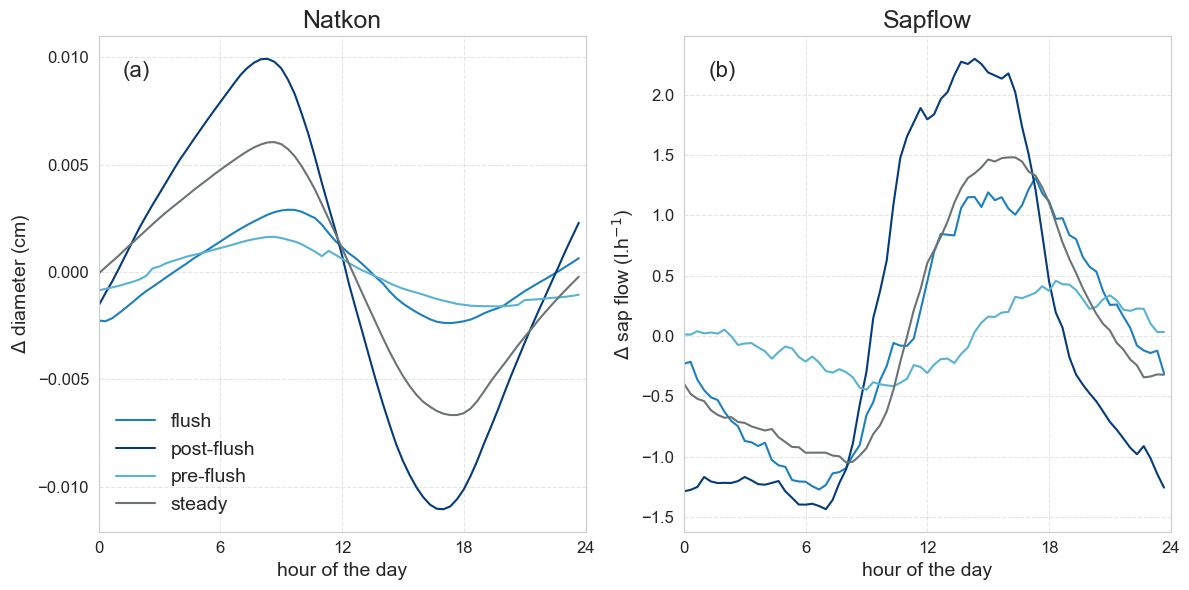

In [59]:
# Build exclusion intervals (start -> start + 1 day)
rain_intervals = [(ts, ts + pd.Timedelta(days=1)) for ts in rain_ids_period2.values()]

used_diurnal_dfs = {'natkon':df_natkon,
              'sapflow':df_sap_flow}

# Filter diurnal_dfs
diurnal_dfs_clean = {}
for key, df in used_diurnal_dfs.items():
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    mask = pd.Series(False, index=df.index)
    for start, end in rain_intervals:
        mask |= (df['DateTime'] >= start) & (df['DateTime'] < end)

    diurnal_dfs_clean[key] = df[~mask]

# Plot with filtered data
plotf.plot_diurnal_profiles_by_category(
    diurnal_dfs_clean,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='phenology',
    color_map=phen_colors,
    ax_title=ax_titles,
    uncertainty=False,
    save=True, 
    filename='diurnal_flush_no_rain_days.png'
)


#### with rain days

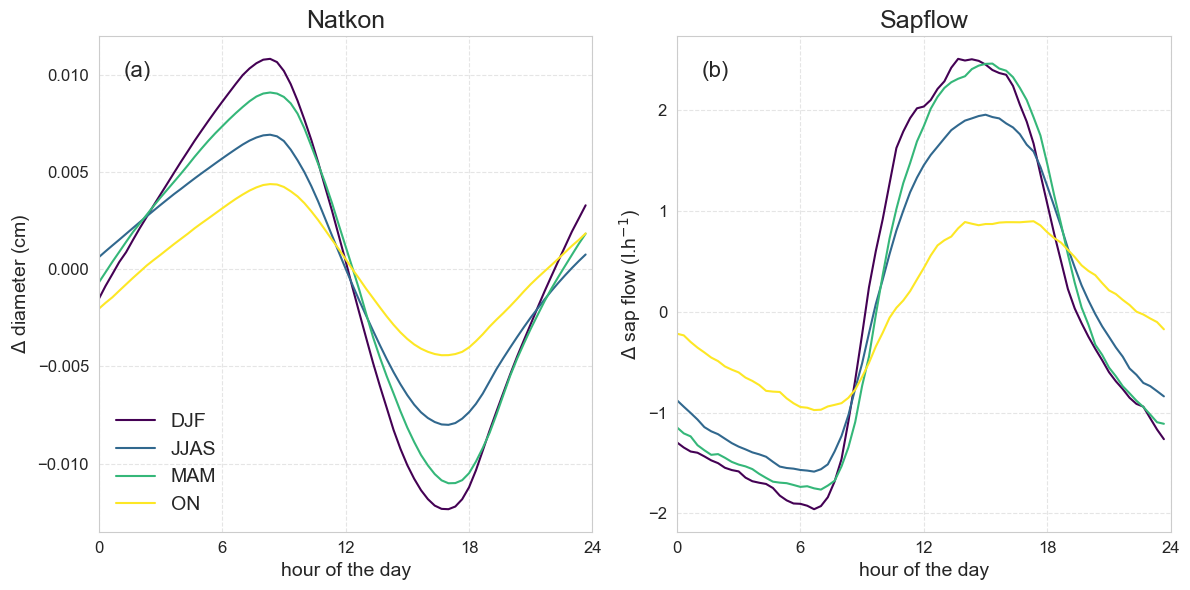

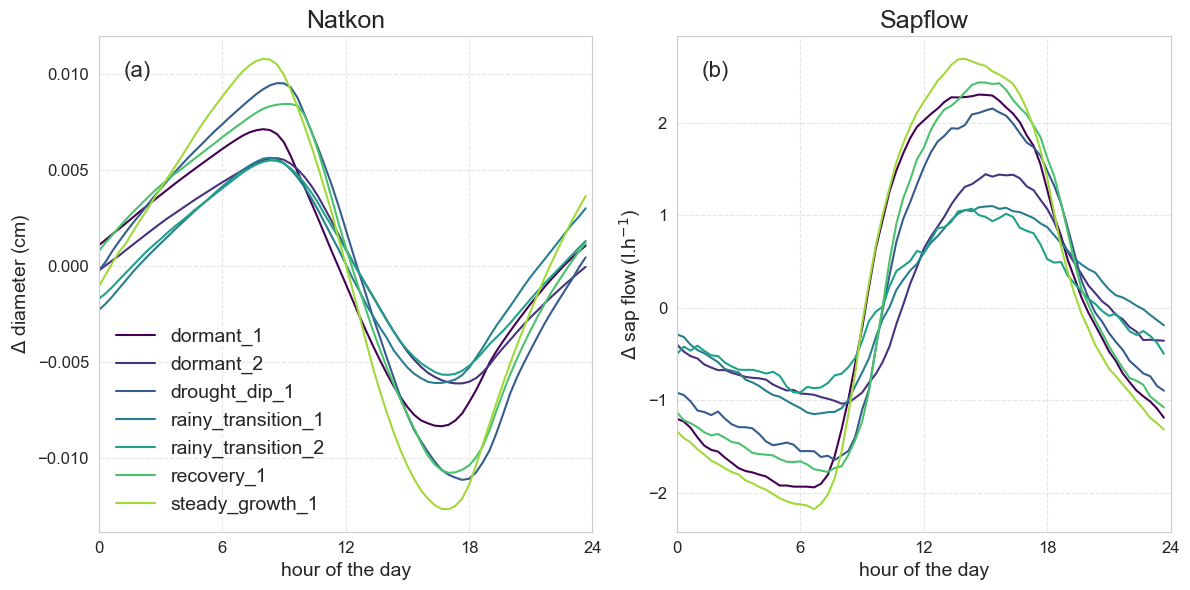

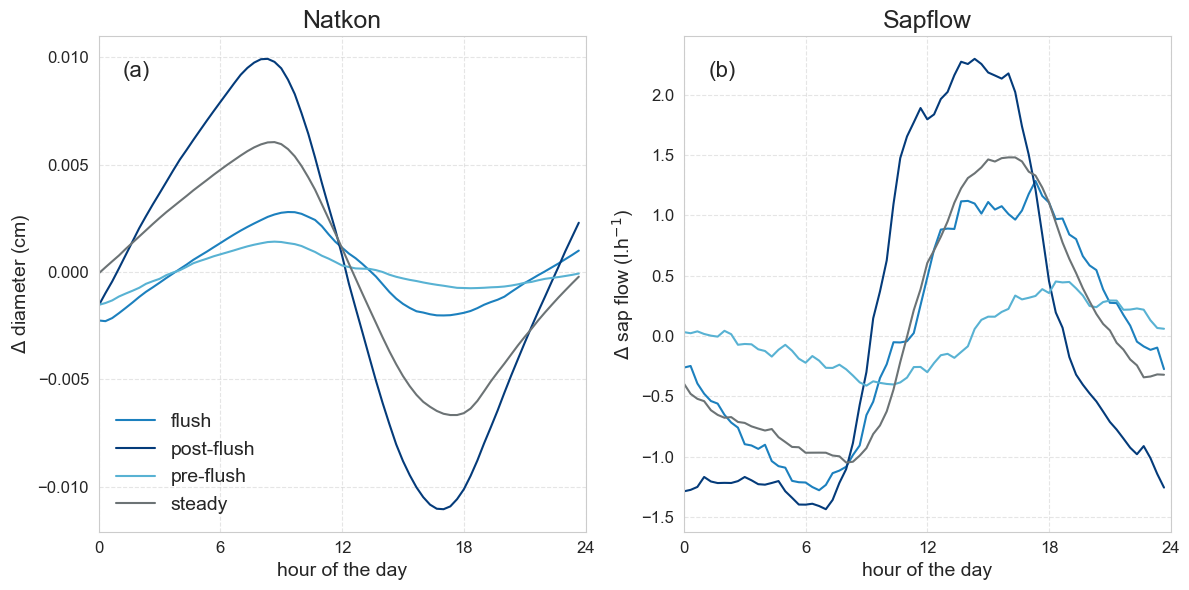

In [60]:
plotf.plot_diurnal_profiles_by_category(
    used_diurnal_dfs,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='season', 
    ax_title = ax_titles
)

plotf.plot_diurnal_profiles_by_category(
    used_diurnal_dfs,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='period', 
    ax_title = ax_titles
)

plotf.plot_diurnal_profiles_by_category(
    used_diurnal_dfs,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='phenology', 
    color_map = phen_colors, 
    ax_title = ax_titles, 
    uncertainty = False, 
    save = True, 
    filename = 'diurnal_flush_phenology.png'
)

# clear_output()


#### DAILY GROWTH METRICS

In [61]:
dataframes = [
    ('TOMST', df_tomst),
    ('Natkon', df_natkon),
    ('Sapflow', df_sap_flow)
]

for name, df in dataframes:
    df.set_index('DateTime', inplace=True)
    metrics, _ = decid.compute_metrics(df)
    df.reset_index(inplace=True)

    metrics = (
        metrics.reset_index()
    )
    
    if name == 'TOMST':
        tomst_metrics = metrics
    elif name == 'Natkon':
        natkon_metrics = metrics
    elif name == 'Sapflow':
        sapflow_metrics = metrics


metric_dfs = {'TOMST':tomst_metrics, 
              'Natkon':natkon_metrics, 
              'Sapflow':sapflow_metrics}

#### trend + diurnal plot for natkon and sapflow

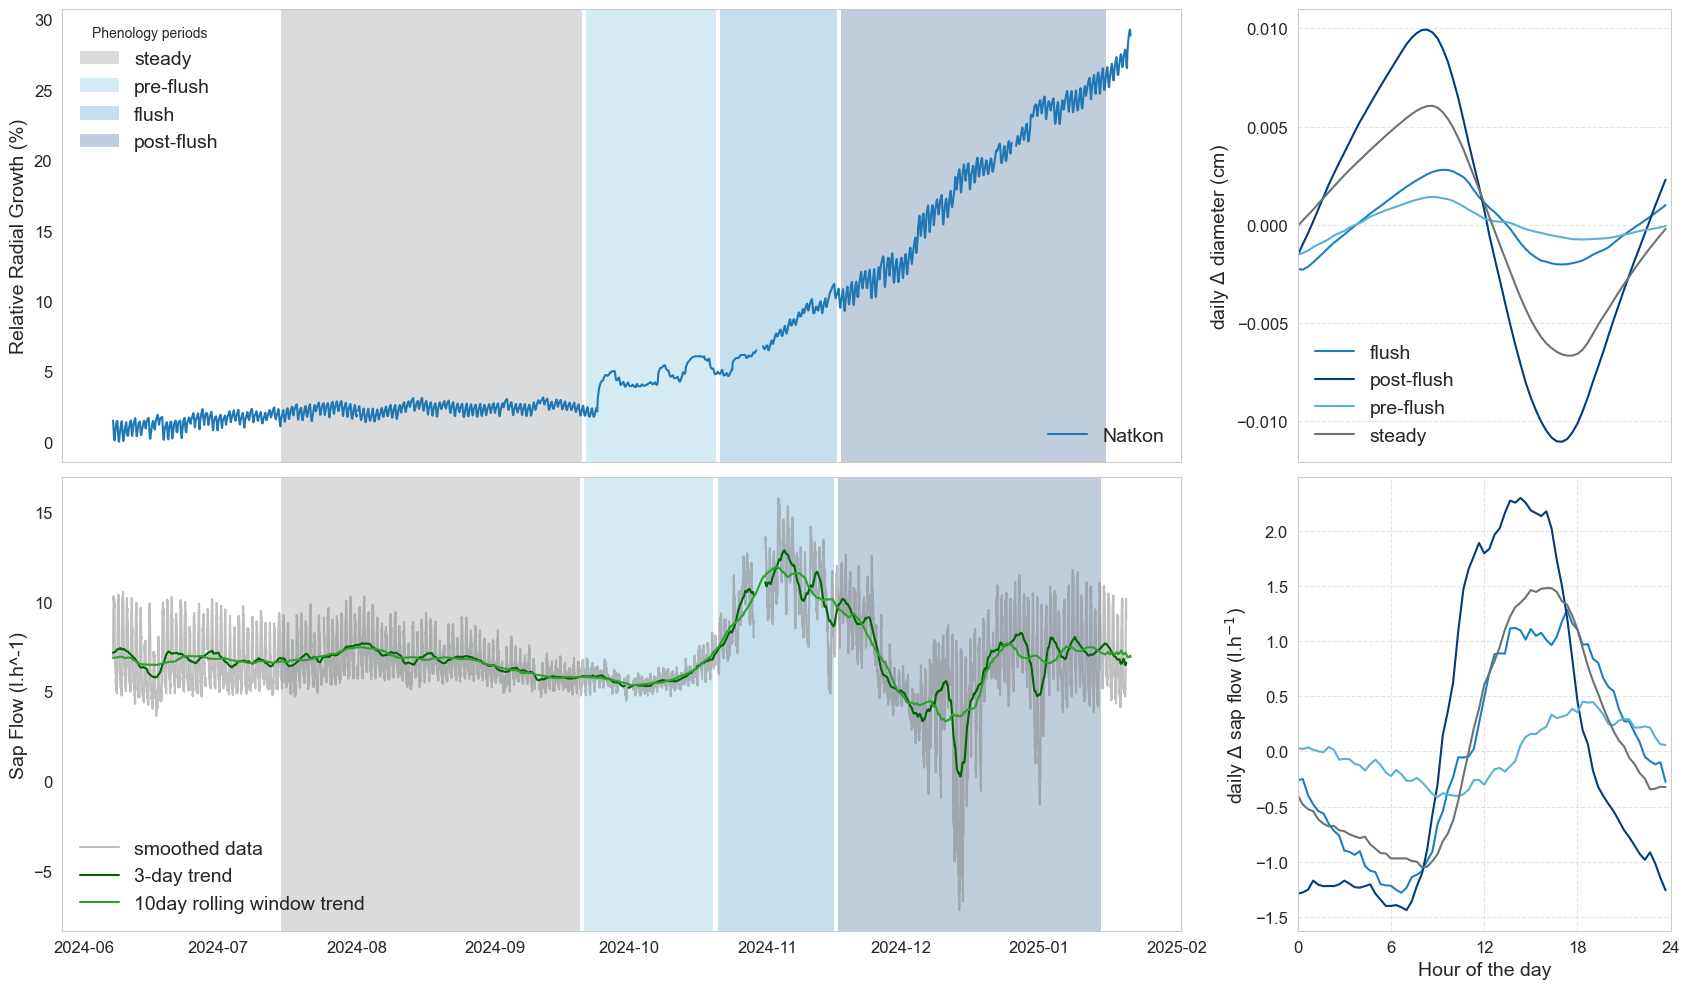

In [62]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Filter zoomed data ---
df_zoom_phen = df_all[(df_all['DateTime'] >= start_date_phen) & 
                      (df_all['DateTime'] <= end_date_phen)]

df_phen_zoom = df_phenocam[(df_phenocam['DateTime'] >= start_date_phen) & 
                                  (df_phenocam['DateTime'] <= end_date_phen)]

# --- Create subplots ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(17, 10), 
                                     gridspec_kw={'height_ratios': [2, 2], 
                                                 'width_ratios': [3, 1]})

## ----------- trend subplots (sensors, left)

# --- Top left: dendrometer sensors ---
df_s = df_zoom_phen[df_zoom_phen['Sensor'] == 'Natkon']
ycol = 'smoothed_signal_pct_period'
ax1.plot(df_s['DateTime'], df_s[ycol]*100, label='Natkon', color = sensor_colors['Natkon'])
ax1.set_ylabel('Relative Radial Growth (%)')
# no x ticks
ax1.set_xticks([])
# ax1.legend(frameon = False)
# ax1.set_title('Event 1: Zoomed Sensor and Phenology Data')

handles_lines, labels_lines = ax1.get_legend_handles_labels()
line_legend = ax1.legend(handles_lines, labels_lines, frameon=False, loc='lower right')

# --- bottom left: Sap Flow ---
df_sap = df_zoom_phen[df_zoom_phen['Sensor'] == 'Sap Flow'].dropna(axis=1, how='all')

ax3.plot(df_sap['DateTime'], df_sap['smoothed_signal'], color = 'gray', alpha = 0.5, label='smoothed data')
ax3.plot(df_sap["DateTime"], df_sap["short_trend"], color='darkgreen', label='3-day trend')
ax3.plot(df_sap['DateTime'], df_sap['smoothed_signal_roll10d'], color = sensor_colors['Sap Flow'], label='10day rolling window trend')
ax3.set_ylabel('Sap Flow (l.h^-1)')
ax3.legend(frameon = False, loc = 'lower left')

# --- Add shading for phenology periods ---
for label, (start, end) in periods_phenology.items():
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    
    # Only shade if the period overlaps with the zoomed range
    if end_dt >= start_date_phen and start_dt <= end_date_phen:
        shade_color = phen_colors.get(label, 'lightgrey')
        for ax in [ax1, ax3]:
            ax.axvspan(start_dt, end_dt, facecolor=shade_color, alpha=0.25, label=f'{label} period', zorder = 0, edgecolor = 'none')
        # print(f"Shading {label} from {start_dt} to {end_dt}")

shading_handles = []
shading_labels = []
for label, color in phen_colors.items():
    patch = Patch(facecolor=color, alpha=0.25, edgecolor='none')
    shading_handles.append(patch)
    shading_labels.append(label)

shade_legend = ax1.legend(shading_handles, shading_labels, frameon=False, loc='upper left', title='Phenology periods')
ax1.add_artist(line_legend)


## ----------- diurnal subplots (right)

sensor_dfs = {'natkon': df_natkon, 'sapflow': df_sap_flow, 'tomst': df_tomst}
ax_titles_lower = {
    'natkon': r'daily $\Delta$ diameter (cm)',
    'tomst': r'daily $\Delta$ diameter (cm)',
    'sapflow': r'daily $\Delta$ sap flow (l.h$^{-1}$)'
}

plotf.subplot_diurnal_profiles_by_category(
    sensor='natkon',
    category='phenology',
    ax=ax2,
    ax_title=ax_titles_lower,
    value_col='detrended_daily_mean',
    sensor_dfs=sensor_dfs, 
    color_map = phen_colors
)

plotf.subplot_diurnal_profiles_by_category(
    sensor='sapflow',
    category='phenology',
    ax=ax4,
    ax_title=ax_titles_lower,
    value_col='detrended_daily_mean',
    sensor_dfs=sensor_dfs, 
    color_map = phen_colors, legend = False
)


import string
for i, ax in enumerate([ax1, ax3]):
    ax.grid(False)
    # ax.text(0.01, 0.95, f'({string.ascii_lowercase[i]})',
    #             transform=ax.transAxes,
    #             fontsize=13, va='top', ha='left')


# # Optional: avoid duplicate legend entries
# handles, labels = ax1.get_legend_handles_labels()
# unique = dict(zip(labels, handles))
# ax1.legend(unique.values(), unique.keys(), frameon = False)

plt.tight_layout()
plt.savefig('../outputs/figures/leaf_flush_zoom_diurnal.png', dpi=300)
plt.show()


#### phenology only plot

2024-10-05 10:00:00
2024-12-01 10:00:00


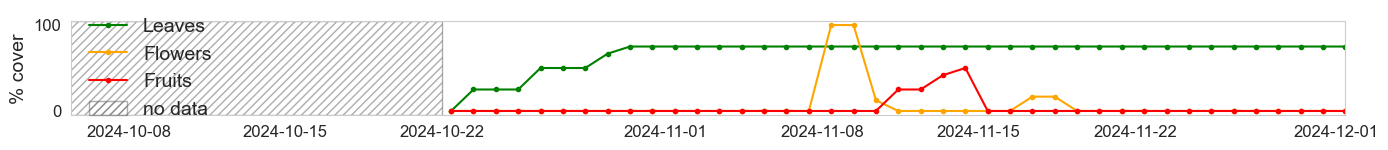

In [63]:
start = 120
end = 177
period = 2

# Get start date of this period
start_zoom = df_phenocam.loc[(df_phenocam['Period'] == (period - 1)) & (df_phenocam['Day_of_Period'] == start),
                             'DateTime'].iloc[0]
end_zoom = df_phenocam.loc[(df_phenocam['Period'] == (period - 1)) & (df_phenocam['Day_of_Period'] == end),
                           'DateTime'].iloc[0]

print(start_zoom)
print(end_zoom)



# --- Filter zoomed data ---
df_zoom = df_all[(df_all['DateTime'] >= start_zoom) & 
                      (df_all['DateTime'] <= end_zoom)]

df_zoom = df_phenocam[(df_phenocam['DateTime'] >= start_zoom) & 
                                  (df_phenocam['DateTime'] <= end_zoom)]

fig, ax = plt.subplots(figsize=(14, 1.5))

ax.plot(df_zoom['DateTime'], df_zoom['%leafs'], color='green', label='Leaves', marker='o', markersize=3)
ax.plot(df_zoom['DateTime'], df_zoom['%flowers'], color='orange', label='Flowers', marker='o', markersize=3)
ax.plot(df_zoom['DateTime'], df_zoom['%fruits'], color='red', label='Fruits', marker='o', markersize=3)

# Find missing values
na_mask = df_zoom['%leafs'].isna()
missing_dates = df_zoom.loc[na_mask, 'DateTime'].dropna().sort_values()

if not missing_dates.empty:
    # Convert to numpy datetime64[D] to make diff comparable in days
    missing_days = missing_dates.dt.floor("D").to_numpy()

    # Split into continuous gaps (1-day increments)
    gaps = np.split(missing_days, np.where(np.diff(missing_days).astype("timedelta64[D]") != np.timedelta64(1, 'D'))[0] + 1)

    for i, gap in enumerate(gaps):
        ax.axvspan(
            gap[0], gap[-1] + np.timedelta64(1, "D"),  # cover the last day fully
            facecolor="none",
            hatch="////",
            edgecolor="#777777",
            alpha=0.6,
            label="no data" if i == 0 else None
        )

ax.set_ylabel("% cover")
ax.set_xlim(start_zoom, end_zoom)
ax.legend(frameon=False, loc="center left")
ax.grid(False)

plt.tight_layout()

plt.savefig('../outputs/figures/phenology_timeline.png')
plt.show()


#### Peeters plot

C:\Users\decle\AppData\Local\Temp\ipykernel_23308\3687787863.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', 12)
C:\Users\decle\AppData\Local\Temp\ipykernel_23308\3687787863.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


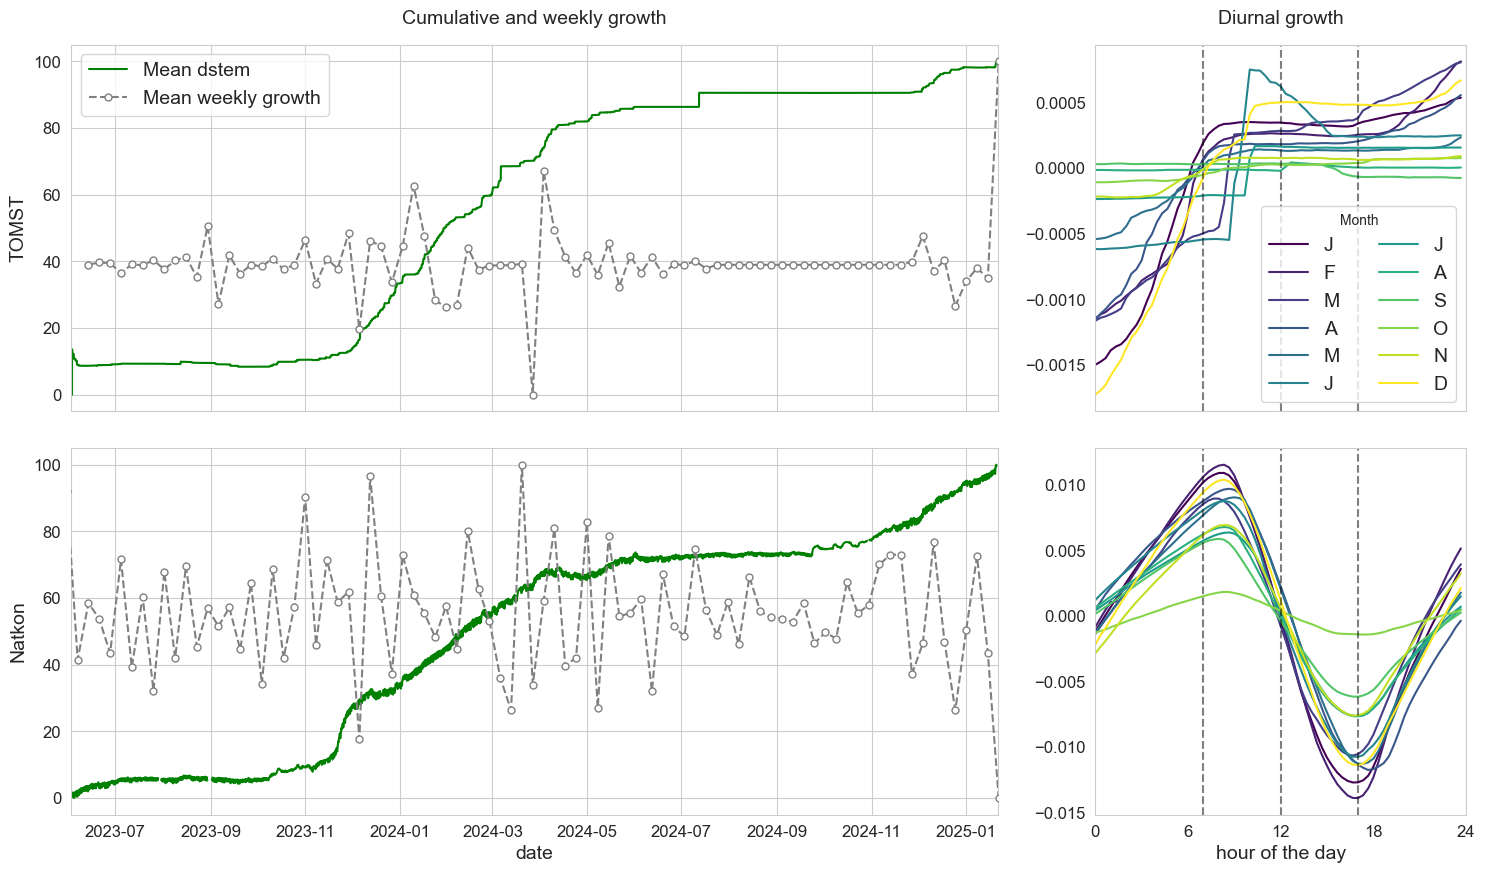

In [64]:

# Month labels and colormap
month_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
cmap = cm.get_cmap('viridis', 12)

# Create figure with GridSpec
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5,1], height_ratios=[1,1], wspace=0.15, hspace = 0.1)

# Axes
ax_tomst_season = fig.add_subplot(gs[0,0])
ax_tomst_diurnal = fig.add_subplot(gs[0,1])
ax_natkon_season = fig.add_subplot(gs[1,0])
ax_natkon_diurnal = fig.add_subplot(gs[1,1])

sensors = [('TOMST', ax_tomst_season, ax_tomst_diurnal), 
           ('Natkon', ax_natkon_season, ax_natkon_diurnal)]

for i, (sensor_name, ax_season, ax_diurnal) in enumerate(sensors):
    sensor_df = df_all[df_all['Sensor']==sensor_name].copy().dropna(axis=1,how='all')
    sensor_metrics = metric_dfs[sensor_name]

    # --- Seasonal curve with 95% CI ---
    grouped = sensor_df.groupby('DateTime')['smoothed_signal_pct_global'].agg(['mean','std','count'])
    # grouped['ci95'] = 1.96 * grouped['std'] / np.sqrt(grouped['count'])
    # ax_season.fill_between(grouped.index, grouped['mean']-grouped['ci95'], grouped['mean']+grouped['ci95'],
    #                        color='grey', alpha=0.3, label='95% CI')
    ax_season.plot(grouped.index, grouped['mean']*100, color='green', label='Mean dstem')

    # Weekly growth dots with edge color
    sensor_metrics['DateTime'] = pd.to_datetime(sensor_metrics['date'])
    sensor_metrics['Week'] = sensor_metrics['DateTime'].dt.isocalendar().week
    sensor_metrics['Year'] = sensor_metrics['DateTime'].dt.year
    weekly = sensor_metrics.groupby(['Year','Week'])['DGR'].mean().reset_index()
    if sensor_name == 'TOMST':
        weekly = weekly.iloc[2:]
    # rescale weekly growth to 0-1
    weekly['DGR_scaled'] = (weekly['DGR'] - weekly['DGR'].min()) / (weekly['DGR'].max() - weekly['DGR'].min())
    weekly['Date_mid'] = pd.to_datetime(weekly['Year'].astype(str) + '-W' + weekly['Week'].astype(str) + '-3', 
                                        format='%G-W%V-%u')
    ax_season.plot(
        weekly['Date_mid'], weekly['DGR_scaled']*100, 
        linestyle='--', marker='o', markersize=5,
        markerfacecolor='white', markeredgecolor='grey',
        color='grey', label='Mean weekly growth', zorder=3
    )

    # --- Monthly diurnal curves ---
    sensor_df['Hour'] = sensor_df['DateTime'].dt.hour + sensor_df['DateTime'].dt.minute/60
    sensor_df['Month'] = sensor_df['DateTime'].dt.month
    diurnal = sensor_df.groupby(['Month','Hour'])['detrended_daily_mean'].mean().reset_index()

    for m in sorted(diurnal['Month'].unique()):
        subset = diurnal[diurnal['Month']==m]
        ax_diurnal.plot(subset['Hour'], subset['detrended_daily_mean'], label=month_labels[m-1], color=cmap(m-1))

    # Vertical lines at 07:00, 12:00, 17:00
    for h in [7,12,17]:
        ax_diurnal.axvline(h, color='black', linestyle='--', alpha=0.5)

    # ------------- set common properties -------------
    # ax_diurnal.set_title(f'{sensor_name} mean monthly diurnal growth')

    # ax_season.set_title(f'{sensor_name} seasonal stem diameter')
    
    ax_season.set_xlim(sensor_df['DateTime'].min(), sensor_df['DateTime'].max())

    ax_season.grid(True)
    ax_diurnal.grid(False)

    if i == 0:
        ax_diurnal.set_title('Diurnal growth', fontsize = 14, pad = 15)

        ax_diurnal.legend(title='Month', ncol = 2)
        ax_diurnal.set_xlim(0,24)
        ax_diurnal.set_xticks([])

        ax_season.set_title('Cumulative and weekly growth', fontsize = 14, pad = 15)
        ax_season.legend()

        ax_season.set_ylabel('TOMST', fontsize = 14)
        ax_season.set_xticklabels([])
        
    elif i == 1:
        ax_diurnal.set_xlabel('hour of the day')
        ax_diurnal.set_xticks([0, 6, 12, 18, 24])
        ax_diurnal.set_xlim(0,24)

        ax_season.set_xlabel('date')
        ax_season.set_ylabel('Natkon', fontsize = 14)


    ax_diurnal.set_ylabel('')
    

plt.tight_layout()
plt.savefig('../outputs/figures/Peters_plot_tomst_natkon.png', dpi=600, bbox_inches='tight')
plt.show()


### sap flow diurnal

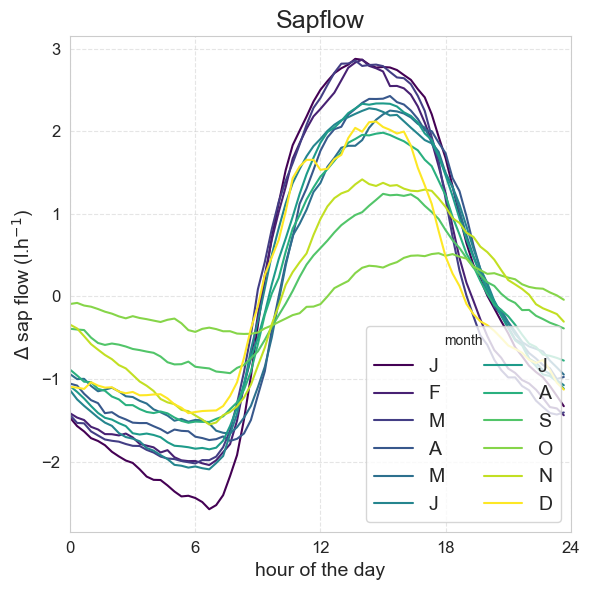

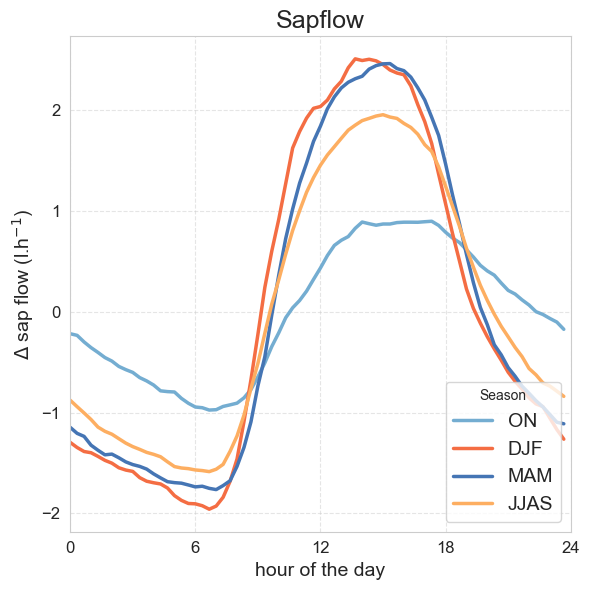

In [65]:
sap_flow_dict ={'sapflow':diurnal_dfs['sapflow']}
sap_flow_col = {'sapflow': 'detrended_daily_mean'}

plotf.plot_diurnal_profiles(sap_flow_dict, sap_flow_col, ax_titles = {'Sapflow': r'$\Delta$ sap flow (l.h$^{-1}$)'})
plotf.plot_diurnal_by_season(sap_flow_dict, sap_flow_col, ax_titles = {'Sapflow': r'$\Delta$ sap flow (l.h$^{-1}$)'})


## statistics on phenology phases

In [66]:
diurnal_dfs_20 = {'Natkon': df_natkon, 
                  'Sapflow': df_sap_flow}

for name in diurnal_dfs_20:
    df = diurnal_dfs_20[name]

    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['date'] = df['DateTime'].dt.date  
    df['period'] = 'unknown'
    df['phenology'] = 'unknown'
    df['season'] = df['DateTime'].map(decid.get_equatorial_season)

    for label, (start, end) in periods.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'period'] = label

    for label, (start, end) in periods_phenology.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'phenology'] = label
    
    # merge with metrics_df (but only daily_amp column)
    metrics = metric_dfs[name]
    df = df.merge(metrics[['date', 'daily_amplitude']], how='left', on='date')

    diurnal_dfs_20[name] = df

In [67]:
phen_colors

{'steady': '#6c7375',
 'pre-flush': '#58b2d3',
 'flush': '#1c80be',
 'post-flush': '#043b7a'}

In [68]:
phen_colors_full = phen_colors.copy()
phen_colors_full['unknown'] = "#252222"

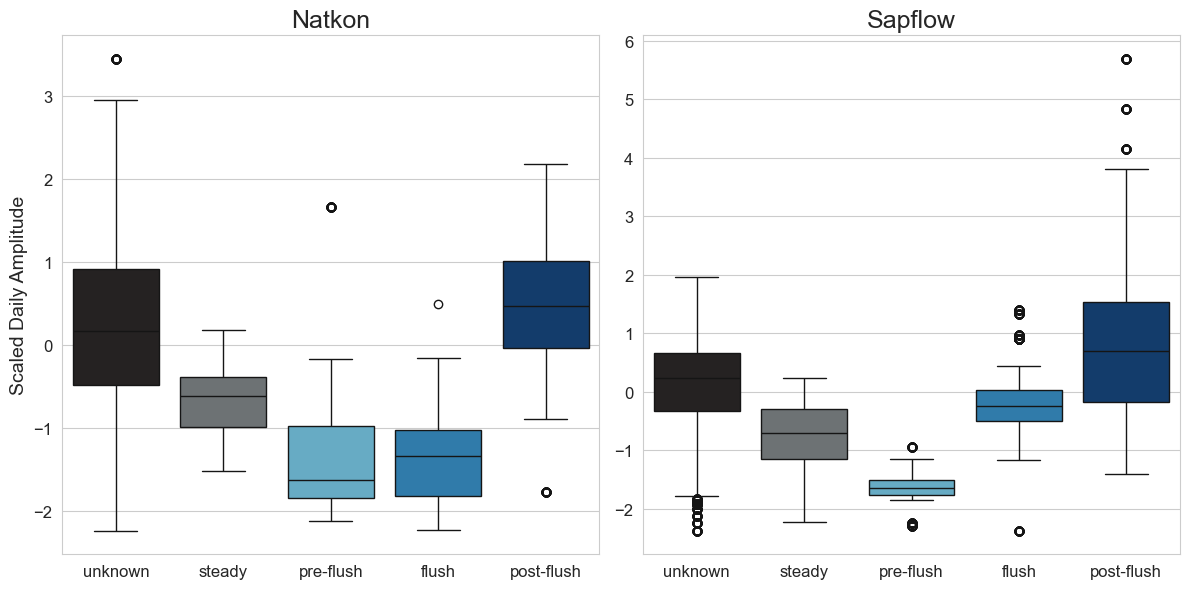

<Axes: xlabel='phenology', ylabel='scaled_amp'>

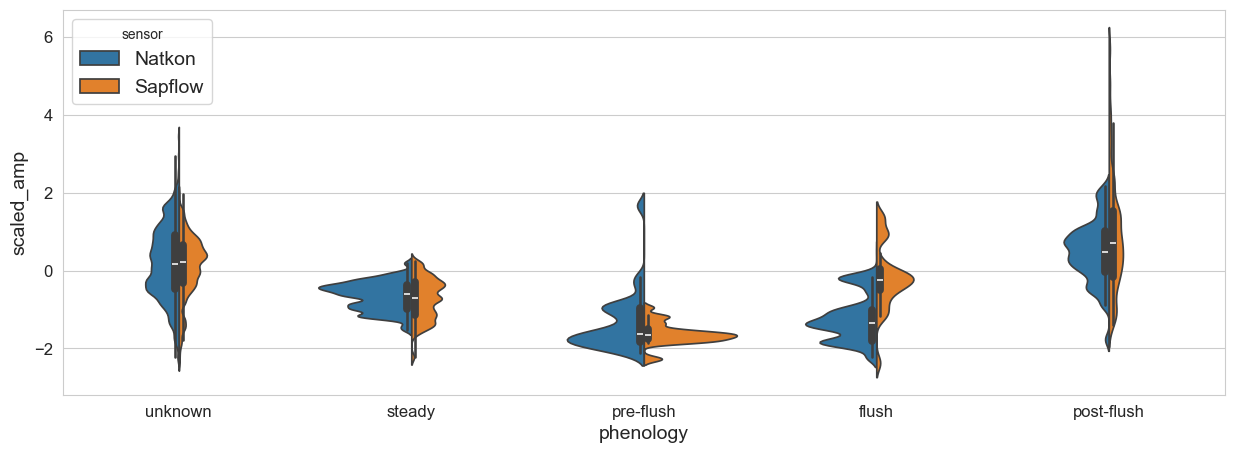

In [81]:
amp_df = pd.concat([
    df.assign(sensor=sensor) for sensor, df in diurnal_dfs_20.items()
])
amp_df = amp_df.reset_index(drop=False)

# Choose your category (e.g., 'phenology')
category = 'phenology'

# Get unique sensors
sensors = amp_df['sensor'].unique()
n_sensors = len(sensors)

amp_df['scaled_amp'] = amp_df.groupby('sensor')['daily_amplitude'].transform(lambda x: (x - x.mean()) / x.std())


# Create subplots
fig, axes = plt.subplots(1, n_sensors, figsize=(6 * n_sensors, 6), sharex=True)

for i, sensor in enumerate(sensors):
    sns.boxplot(
        data=amp_df[amp_df['sensor'] == sensor],
        x=category,
        y='scaled_amp',
        hue = category,
        palette=phen_colors_full,
        ax=axes[i]
    )
    axes[i].set_title(f'{sensor}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

axes[0].set_ylabel('Scaled Daily Amplitude')

plt.tight_layout()

from scipy.stats import kruskal

for i, sensor in enumerate(sensors):
    groups = [
        group['scaled_amp'].dropna().values
        for name, group in amp_df[amp_df['sensor'] == sensor].groupby(category)
    ]
    if all(len(g) > 0 for g in groups):
        stat, p = kruskal(*groups)
        # axes[i].set_title(f'{sensor} (p={p:.20f})')

plt.savefig("../outputs/figures/daily_amp_by_phenology.png", dpi=600, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(15, 5))
sns.violinplot(data=amp_df, x='phenology', y='scaled_amp', hue='sensor', split=True)


In [28]:
print(amp_df.groupby(['sensor', 'phenology']).size())


sensor   phenology 
Natkon   flush          1873
         post-flush     4249
         pre-flush      2089
         steady         4825
         unknown       30078
Sapflow  flush          1873
         post-flush     4249
         pre-flush      2089
         steady         4825
         unknown       30077
dtype: int64


In [ ]:
from scipy.stats import kruskal

# Loop through each sensor
for sensor in amp_df['sensor'].unique():
    # Group daily_amp values by category (e.g., phenology)
    groups = [
        group['daily_amplitude'].dropna().values
        for name, group in amp_df[amp_df['sensor'] == sensor].groupby('phenology')
    ]
    
    # Only run test if all groups have data
    if all(len(g) > 0 for g in groups):
        stat, p = kruskal(*groups)
        print(f"{sensor}: H-stat={stat:.2f}, p={p:.8f}")

import scikit_posthocs as sp
import pandas as pd

# Loop through sensors
for sensor in amp_df['sensor'].unique():
    df_sensor = amp_df[amp_df['sensor'] == sensor]
    
    # Run Dunn's test
    dunn_results = sp.posthoc_dunn(
        df_sensor, 
        val_col='daily_amplitude', 
        group_col='phenology', 
        p_adjust='bonferroni'
    )
    
    # Round p-values for reporting
    dunn_rounded = dunn_results.round(4)
    
    # Optional: replace very small p-values with '<0.001'
    dunn_rounded = dunn_rounded.applymap(lambda x: '<0.001' if x < 0.001 else x)
    
    # Save as CSV for report
    dunn_rounded.to_csv(f"../outputs/dunn_{sensor}.csv")
    
    # Print nicely in notebook
    print(f"\nDunn's test for {sensor}:")
    display(dunn_rounded)


Natkon: H-stat=11409.78, p=0.00000000
Sapflow: H-stat=10965.51, p=0.00000000


## diurnal variation duting leaf flush

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
C:\Users\decle\AppData\Local\Temp\ipykernel_23308\2423274766.py:17: SyntaxWarning: invalid escape sequence '\D'
  ax_title = {'Natkon': '$\Delta$ diameter (cm)', 'Sapflow': '$\Delta$ sap flow (l.h$^{-1}$)'},
C:\Users\decle\AppData\Local\Temp\ipykernel_23308\2423274766.py:17: SyntaxWarning: invalid escape sequence '\D'
  ax_title = {'Natkon': '$\Delta$ diameter (cm)', 'Sapflow': '$\Delta$ sap flow (l.h$^{-1}$)'},


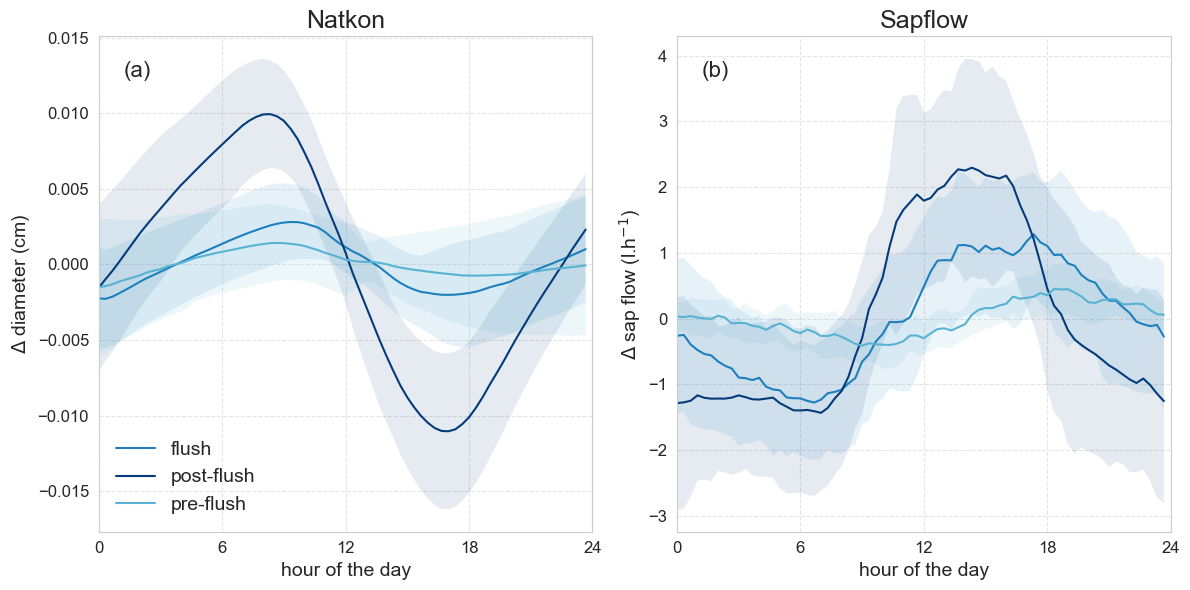

In [31]:
# using native resolution for plotting
flush_dfs = used_diurnal_dfs.copy()

for key in flush_dfs:
    flush_dfs[key] = flush_dfs[key][
        (flush_dfs[key]['phenology'] == 'pre-flush') |
        (flush_dfs[key]['phenology'] == 'flush') |
        (flush_dfs[key]['phenology'] == 'post-flush')
    ]


plotf.plot_diurnal_profiles_by_category(
    flush_dfs,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='phenology', 
    color_map = phen_colors, 
    ax_title = {'Natkon': '$\Delta$ diameter (cm)', 'Sapflow': '$\Delta$ sap flow (l.h$^{-1}$)'}, 
    uncertainty = True
)


#### diurnal change per 3 days

In [32]:
def plot_diurnal_by_phase(flush_dfs, bin_size_days=3, colormap='viridis'):
    def bin_dates(dt_series):
        return ((dt_series.dt.floor('D') - dt_series.dt.floor('D').min()) // pd.Timedelta(days=bin_size_days)).astype(int)

    for sensor, df in flush_dfs.items():
        df = df.copy()
        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df['hour'] = df['DateTime'].dt.hour
        df['bin'] = bin_dates(df['DateTime'])
        # print(df['bin'].value_counts())
        # print(df['DateTime'].min(), df['DateTime'].max())


        phenologies = df['phenology'].unique()
        n_phases = len(phenologies)

        fig, axes = plt.subplots(n_phases, 1, figsize=(12, 4 * n_phases), sharex=True)
        if n_phases == 1:
            axes = [axes]

        for ax, phase in zip(axes, phenologies):
            phase_df = df[df['phenology'] == phase]
            grouped = phase_df.groupby(['bin', 'hour'])['detrended_daily_mean'].mean().reset_index()

            bin_ids = sorted(grouped['bin'].unique())
            norm = mcolors.Normalize(vmin=min(bin_ids), vmax=max(bin_ids))
            cmap = plt.colormaps[colormap]

            for bin_id in bin_ids:
                subset = grouped[grouped['bin'] == bin_id]
                color = cmap(norm(bin_id))
                ax.plot(subset['hour'], subset['detrended_daily_mean'], label=f'Bin {bin_id}', color=color)

            ax.set_title(f'{sensor} - {phase}')
            ax.set_ylabel('Avg Detrended Value')
            ax.legend()

        axes[-1].set_xlabel('Hour of Day')
        plt.tight_layout()
        plt.show()


plot_diurnal_by_phase(flush_dfs, bin_size_days=3)

clear_output()

In [33]:
# Create a folder to store the CSVs
os.makedirs('../outputs/flush_data', exist_ok=True)

# Save each DataFrame

for name, df in flush_dfs.items():
    df.to_csv(f'../outputs/flush_data/{name}.csv', index=False)

In [34]:
#DOES NOT WORK
#! "C:/Users/decle/OneDrive - UGent/_Vakantiejob_Rune_Declercq/.venv/Scripts/python.exe" "C:/Users/decle/OneDrive - UGent/_Vakantiejob_Rune_Declercq/scripts/flush_animation.py"


# SAVE

In [35]:
df_zoom_phen.to_csv('../outputs/df_zoom_phen2.csv', index=False)


for name, df in used_diurnal_dfs.items():
    df.to_csv(f'../outputs/diurnal_dfs/{name}.csv', index=False)